In [1]:
import pandas as pd

from collections import Counter
from gensim.corpora import Dictionary
from gensim.models import LdaMulticore
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
import nltk
from nltk import ngrams

In [3]:
df = pd.read_csv('preprocessed_data.csv')

In [4]:
df['transcript']

0      ['humor', 'par', 'dinero', 'humor', 'matar', '...
1      ['uy', 'cuidado', 'ay', 'ay', 'ay', 'ay', 'ay'...
2      ['dio', 'dio', 'estar', 'jugar', 'directo', 't...
3      ['dio', 'venir', 'cielo', 'guapo', 'amigo', 't...
4      ['llave', 'deber', 'teír', 'xxxx', 'tío', 'val...
                             ...                        
390    ['odio', 'jodeír', 'plan', 'malo', 'militar', ...
391    ['droga', 'infinito', 'infinito', 'pinchar', '...
392    ['cariño', 'navidad', 'pecho', 'pezzotti', 'es...
393    ['tener', 'twitter', 'guapo', 'facebook', 'tue...
394    ['oh', 'dont', 'know', 'okay', 'ready', 'to', ...
Name: transcript, Length: 395, dtype: object

In [5]:
occurrences_per_transcript = df['transcript'].str.count(r'xxxx')

# Calculate total occurrences
total_insults = occurrences_per_transcript.sum()

# Calculate average occurrence per transcript
average_occurrence = total_insults / len(df)

print(f"Average occurrences of 'xxxx' per transcript: {average_occurrence:.2f}")
print(f"Total occurrences of 'xxxx' per transcript: {total_insults:.2f}")

Average occurrences of 'xxxx' per transcript: 16.18
Total occurrences of 'xxxx' per transcript: 6392.00


In [6]:
import ast

processed_transcripts = df['transcript'].apply(ast.literal_eval)


In [7]:
type(processed_transcripts)

pandas.core.series.Series

In [8]:
# 1. Identify commonly used phrases using N-grams
all_ngrams = [ngram for transcript in processed_transcripts for ngram in ngrams(transcript, 3)]  # trigrams
common_phrases = Counter(all_ngrams).most_common(20)
print("Common Phrases:")
for phrase, freq in common_phrases:
    print(f"{' '.join(phrase)}: {freq}")

Common Phrases:
correr correr correr: 343
valer valer valer: 333
ay ay ay: 238
música aplauso música: 143
xxxx xxxx xxxx: 109
hola hola hola: 98
mira mira mira: 85
música música música: 79
ojo ojo ojo: 74
pam pam pam: 67
rápido rápido rápido: 63
dio dio dio: 57
uy uy uy: 55
suscríbete dale like: 53
dale like querer: 45
favor favor favor: 45
ey ey ey: 44
pa pa pa: 43
go go go: 41
ver ver ver: 40


In [9]:
# 2. Identify topics using LDA
dictionary = Dictionary(processed_transcripts)
corpus = [dictionary.doc2bow(transcript) for transcript in processed_transcripts]
lda_model = LdaMulticore(corpus, id2word=dictionary, num_topics=5, passes=15, workers=4)
print("\nTopics:")
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic: {idx}, Words: {topic}")


Topics:
Topic: 0, Words: 0.027*"xxxx" + 0.020*"valer" + 0.012*"música" + 0.009*"casa" + 0.008*"ver" + 0.006*"gente" + 0.006*"pasar" + 0.006*"querer" + 0.006*"tío" + 0.006*"estar"
Topic: 1, Words: 0.050*"música" + 0.033*"valer" + 0.011*"tío" + 0.008*"ver" + 0.007*"xxxx" + 0.006*"ah" + 0.006*"pasar" + 0.006*"eh" + 0.005*"chico" + 0.005*"querer"
Topic: 2, Words: 0.019*"valer" + 0.014*"casa" + 0.010*"xxxx" + 0.010*"música" + 0.010*"querer" + 0.009*"ver" + 0.009*"cosa" + 0.007*"pasar" + 0.007*"estar" + 0.006*"plan"
Topic: 3, Words: 0.006*"the" + 0.006*"matar" + 0.005*"you" + 0.005*"misión" + 0.005*"ver" + 0.005*"jesús" + 0.004*"i" + 0.004*"cadáver" + 0.004*"cámara" + 0.004*"abajo"
Topic: 4, Words: 0.031*"valer" + 0.029*"xxxx" + 0.010*"música" + 0.008*"ver" + 0.008*"querer" + 0.008*"casa" + 0.006*"venir" + 0.006*"pasar" + 0.006*"tío" + 0.006*"gente"


In [10]:
# 3. Identify unique terms/values using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.85)
tfidf_matrix = tfidf_vectorizer.fit_transform([' '.join(transcript) for transcript in processed_transcripts])
feature_names = tfidf_vectorizer.get_feature_names_out()
sorted_items = sorted(list(enumerate(tfidf_matrix.sum(axis=0).tolist()[0])), key=lambda x: x[1], reverse=True)
print("\nUnique Terms:")
for idx, score in sorted_items[:10]:
    print(f"{feature_names[idx]}: {score}")



Unique Terms:
casa: 26.61243696907685
eh: 15.863475893452524
tío: 13.997984836387701
plan: 13.744236610707103
poner: 12.651005466641855
dejar: 12.516552018492394
favor: 11.894675664401024
correr: 11.632063962641805
decir: 11.180523685358974
chico: 11.140901132811893


In [14]:
all_tokens = [token for transcript in processed_transcripts for token in transcript]

# Count the occurrences of each token
word_freq = Counter(all_tokens)

# Display the 10 most common words and their frequencies
most_common_words = word_freq.most_common(15)
print(most_common_words)

# If you prefer the output in a DataFrame
df_word_freq = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])
print(df_word_freq)

[('valer', 8908), ('xxxx', 6392), ('música', 6293), ('casa', 3051), ('ver', 2928), ('querer', 2621), ('pasar', 2234), ('cosa', 2079), ('tío', 1950), ('venir', 1865), ('gente', 1835), ('estar', 1817), ('plan', 1558), ('dejar', 1518), ('favor', 1439)]
      Word  Frequency
0    valer       8908
1     xxxx       6392
2   música       6293
3     casa       3051
4      ver       2928
5   querer       2621
6    pasar       2234
7     cosa       2079
8      tío       1950
9    venir       1865
10   gente       1835
11   estar       1817
12    plan       1558
13   dejar       1518
14   favor       1439


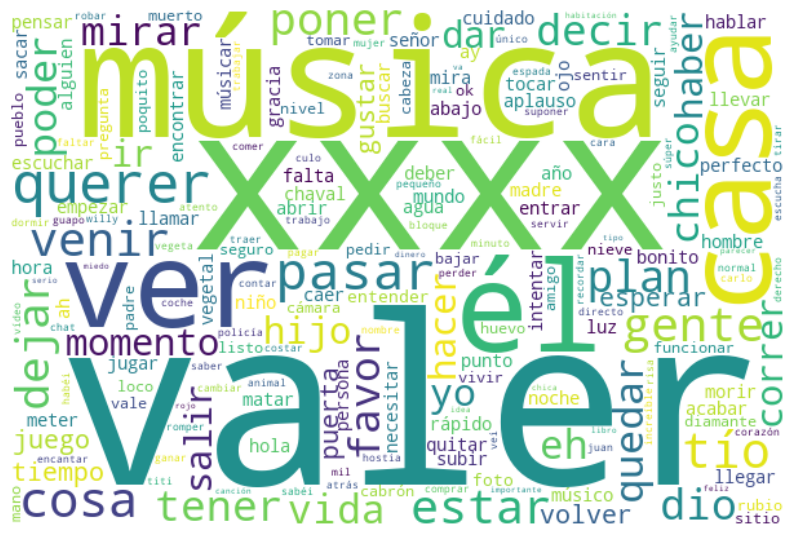

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Convert the list of tokens back into a single string for each transcript
all_text = ' '.join([' '.join(transcript) for transcript in processed_transcripts])

# Generate the word cloud.
wordcloud = WordCloud(background_color="white",  # Set the background color to white
                      width=600,                # Width of the canvas
                      height=400,               # Height of the canvas
                      collocations=False,       # Avoid duplicate words
                      colormap='viridis'        # Color scheme
                     ).generate(all_text)

# Plot the word cloud.
plt.figure(figsize=(10, 8))      
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Save the visualization to a file.
plt.savefig("transcript_wordcloud.png")

plt.show()